In [2]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.datasets import load_breast_cancer

In [6]:
# Cargar el conjunto de datos de cáncer de mama de sklearn
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

inputs = df.drop(columns=['target'])
target = df['target']


print(df.columns)
df.head()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size=0.2, random_state=42)
print('train inputs:', train_inputs.shape)
print('train targets:', train_target.shape)
print('test inputs:', test_inputs.shape)
print('test targets:', test_target.shape)

train inputs: (455, 30)
train targets: (455,)
test inputs: (114, 30)
test targets: (114,)


In [30]:
# Escalado de características
scaler = MinMaxScaler()
train_inputs = scaler.fit_transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

In [9]:
# Configuración de los parámetros del modelo
model_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [10, 50, 100],
    'min_samples_leaf': [10, 50, 100],
    'criterion': ['gini', 'entropy']
}

In [10]:
# Búsqueda en grilla
clf_grid = GridSearchCV(RandomForestClassifier(class_weight="balanced"), model_params, cv=5, scoring='roc_auc')
clf_grid.fit(train_inputs, train_target)
print("Mejores parámetros (Grid Search):", clf_grid.best_params_)

Mejores parámetros (Grid Search): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}


In [11]:
# Búsqueda aleatoria
clf_random = RandomizedSearchCV(RandomForestClassifier(class_weight="balanced"), model_params, n_iter=50, cv=5, scoring='roc_auc', random_state=42)
clf_random.fit(train_inputs, train_target)
print("Mejores parámetros (Random Search):", clf_random.best_params_)

Mejores parámetros (Random Search): {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'entropy'}


In [12]:
# Entrenamiento del modelo con los mejores parámetros encontrados
best_model = clf_grid.best_estimator_
best_model.fit(train_inputs, train_target)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50)

In [13]:
# Predicciones y evaluación
predictions = best_model.predict(test_inputs)
cm = confusion_matrix(test_target, predictions)

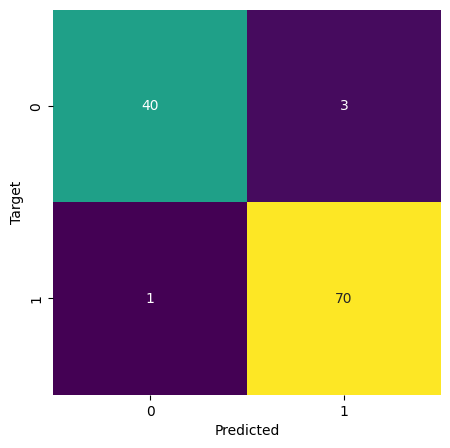

In [17]:
# Visualización de la matriz de confusión
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.show()

In [25]:
# Asumiendo que 'test_target' y 'prediccion' están definidos y que 'prediccion' son las predicciones del modelo
tn, fp, fn, tp = cm.ravel()

print("Number of true positives  (tp) = ", tp)
print("Number of true negatives  (tn) = ", tn)
print("Number of false positives (fp) = ", fp)
print("Number of false negatives (fn) = ", fn)

print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))


Number of true positives  (tp) =  70
Number of true negatives  (tn) =  40
Number of false positives (fp) =  3
Number of false negatives (fn) =  1
Precision                                          = tp / (tp + fp) = 0.958904109589041
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 0.9859154929577465
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.9302325581395349
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.06976744186046512
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.014084507042253521


In [24]:
accuracy = accuracy_score(test_target, predictions)
f1 = f1_score(test_target, predictions)
roc_auc = roc_auc_score(test_target, predictions)
gini = 2 * roc_auc - 1
print("Accuracy:", accuracy) #(TP + TN) / (TP + TN + FP + FN)
print("F1 Score:", f1)       #2 * (Precision * Recall) / (Precision + Recall)
print("ROC AUC:", roc_auc)
print("Gini:", gini)

Accuracy: 0.9649122807017544
F1 Score: 0.9722222222222222
ROC AUC: 0.9580740255486406
Gini: 0.9161480510972813


AUC =  0.9580740255486406


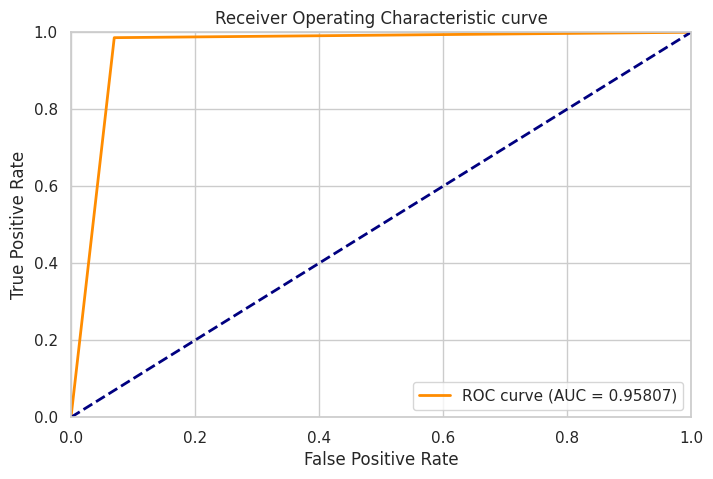

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_target , predictions)

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(test_target , predictions)
print("AUC = ", roc_auc)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

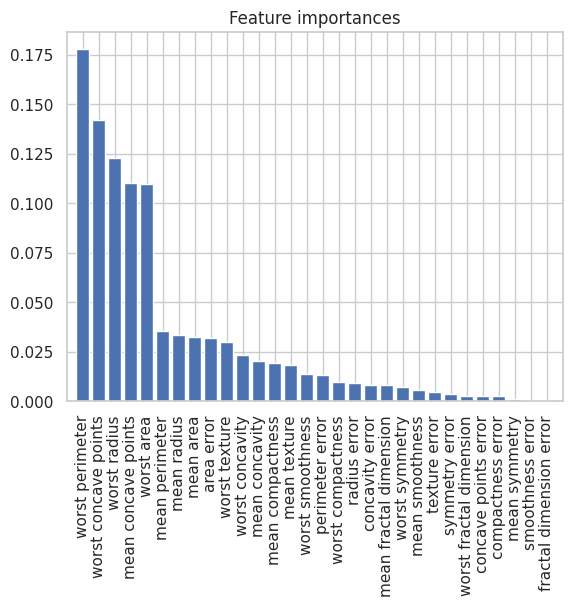

In [26]:
# Importancia de las características
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_inputs.shape[1]), importances[indices], align="center")
plt.xticks(range(train_inputs.shape[1]), np.array(inputs.columns)[indices], rotation=90)
plt.xlim([-1, train_inputs.shape[1]])
plt.show()